# Data Professions Salary Survey Data Analysis ---- Project 

 ##### @Kaggle @tableau

> ### By Mohamad Ehthesham S

Data can be found here - https://www.kaggle.com/datasets/parulpandey/2020-it-salary-survey-for-eu-region

> ### Data Processing and Data Cleaning 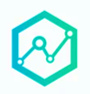 

### Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import re
import openpyxl


### Get Data

In [2]:
db_2020=pd.read_csv(r"D:\New folder (2)\Data project IT salary\Raw Files\IT Salary Survey EU  2020.csv")
db_2018=pd.read_csv(r"D:\New folder (2)\Data project IT salary\Raw Files\IT Salary Survey EU 2018.csv")
db_2019=pd.read_csv(r"D:\New folder (2)\Data project IT salary\Raw Files\T Salary Survey EU 2019.csv")


_2020=db_2020
_2018=db_2018
_2019=db_2019


### 2020

In [3]:
_2020.head(2)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


#### Convert the 'Timestamp' column to datetime format

In [4]:
# seperate timestamp

_2020['Timestamp'] = pd.to_datetime(_2020['Timestamp'], format='%d/%m/%Y %H:%M:%S')

# Extract the date and time components into separate columns
_2020['Date'] = _2020['Timestamp'].dt.date
_2020['Time'] = _2020['Timestamp'].dt.time

_2020.insert(1, 'Date', _2020.pop('Date'))
_2020.insert(2, 'Time', _2020.pop('Time'))

In [5]:
_2020.head(2)

,Timestamp,Date,Time,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,2020-11-24 11:14:15,2020-11-24,11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,2020-11-24 11:14:16,2020-11-24,11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


#### Rename the columns

In [6]:

_2020.rename(columns={"Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country":"Annual brutto salary (without bonus and stocks) one year ago"},inplace=True)

#### counting number of nulls

In [7]:

g=_2020.isnull().sum()

null_counts_df = pd.DataFrame({'Column': g.index, 'Null Count': g.values})
null_counts_df.sort_values(ascending=False,by='Null Count')

,Column,Null Count
23,Have you been forced to have a shorter working...,880
24,Have you received additional monetary support ...,791
15,Annual bonus+stocks one year ago. Only answer ...,639
13,Yearly bonus + stocks in EUR,424
14,Annual brutto salary (without bonus and stocks...,368
11,Other technologies/programming languages you u...,157
10,Your main technology / programming language,127
16,Number of vacation days,68
8,Years of experience in Germany,32
18,Сontract duration,29


### 2019

#### Rename the columns_

In [9]:

_2019.rename(columns={'Position (without seniority)':'Position ',"Years of experience":"Total years of experience","Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country":"Annual brutto salary (without bonus and stocks) one year ago"},inplace=True)

#### Convert the 'Timestamp' column to datetime format

In [10]:


_2019['Zeitstempel'] = pd.to_datetime(_2019['Zeitstempel'], format='%d.%m.%Y %H:%M:%S')

# Extract the date and time components into separate columns
_2019['Date'] = _2019['Zeitstempel'].dt.date
_2019['Time'] = _2019['Zeitstempel'].dt.time

_2019.insert(1, 'Date', _2019.pop('Date'))
_2019.insert(2, 'Time', _2019.pop('Time'))
_2019.rename(columns={'Zeitstempel':'Timestamp'},inplace=True)

In [11]:
_2019.head(1)

,Timestamp,Date,Time,Age,Gender,City,Seniority level,Position,Total years of experience,Your main technology / programming language,...,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company name,Company size,Company type,Ð¡ontract duration,Company business sector,0
0,2019-12-02 11:18:26,2019-12-02,11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,...,NaN,29.0,4.0,English,NaN,50-100,Startup,unlimited,Tourism,NaN


### 2018

#### Rename the columns

In [12]:

_2018.rename(columns={'Position':'Position ',"Years of experience":"Total years of experience",'Your level':'Seniority level','Salary one year ago':'Annual brutto salary (without bonus and stocks) one year ago'},inplace=True)

#### Convert the 'Timestamp' column to datetime format

In [13]:

_2018['Timestamp'] = pd.to_datetime(_2018['Timestamp'], format='%d/%m/%Y %H:%M:%S')

# Extract the date and time components into separate columns
_2018['Date'] = _2018['Timestamp'].dt.date
_2018['Time'] = _2018['Timestamp'].dt.time

_2018.insert(1, 'Date', _2018.pop('Date'))
_2018.insert(2, 'Time', _2018.pop('Time'))

In [14]:
_2018.head(1)

,Timestamp,Date,Time,Age,Gender,City,Position,Total years of experience,Seniority level,Current Salary,Annual brutto salary (without bonus and stocks) one year ago,Salary two years ago,Are you getting any Stock Options?,Main language at work,Company size,Company type
0,2018-12-14 12:41:33,2018-12-14,12:41:33,43.0,M,München,QA Ingenieur,11.0,Senior,77000.0,76200.0,68000.0,No,Deutsch,100-1000,Product


### Merged 2018,2019,2020

In [15]:
# Merge the DataFrames based on the 'Date' column while excluding duplicates
concatenated_df = pd.concat([_2018, _2019, _2020])

# Remove duplicate rows based on 'Date' column
unique_dates_df = concatenated_df.drop_duplicates(subset='Timestamp')

In [16]:
concatenated_df.head(1)

,Timestamp,Date,Time,Age,Gender,City,Position,Total years of experience,Seniority level,Current Salary,...,Years of experience in Germany,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual bonus+stocks one year ago. Only answer if staying in same country,Employment status,Сontract duration,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,2018-12-14 12:41:33,2018-12-14,12:41:33,43.0,M,München,QA Ingenieur,11.0,Senior,77000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
db=concatenated_df

#### replacing gender names to standard names

In [18]:

#db['Gender'].unique()
db['Gender'] = db['Gender'].replace(['Male', 'Female', 'Diverse'], ['M', 'F', 'Others'])

db['Company size']=db['Company size'].replace('up to 50-50','up to 50',regex=True)



con=db['Seniority level']=='no idea, there are no ranges in the firm '
db.loc[con,'Seniority level']='No level'

db['Seniority level'] = db['Seniority level'].apply(lambda x: str(x).capitalize())

#### cleaning non-numeric characters to numeric

In [19]:

db.loc[855,'Total years of experience']='23'
db.loc[1089,'Total years of experience']='6'
db.loc[1209,'Total years of experience']='0'
db.loc[805,'Total years of experience']='11'

db['Total years of experience'] = db['Total years of experience'].str.replace(',', '.')

#### conveting to numbers format all values and assigning 0 to all less than 1 year exp

In [20]:

db["Total years of experience"] = pd.to_numeric(db["Total years of experience"], errors='coerce')

mask=db['Total years of experience'] < 1
db.loc[mask,'Total years of experience']=0

#### Split the values in the column by comma and keep only the first part

In [23]:

old=['MA','GdaÅ„sk','DÃ¼sseldorf','WÃ¼rzburg','Wã¼rzburg']

new=['Massachusetts','Gdańsk','Düsseldorf','Würzburg','Würzburg']
db['City'].replace(old,new,inplace=True)
db['City'] = db['City'].str.split(',', n=1).str[0]


db['City']=db['City'].apply(lambda x:str(x).capitalize())


#removing 
c=[3,4,5]
coniditon=db['Annual brutto salary (without bonus and stocks) one year ago'].astype(str).str.len().isin(c)

db.loc[coniditon,'Annual brutto salary (without bonus and stocks) one year ago']='NaN'

#### Clean the 'Main language at work' column

In [24]:

db['Main language at work'] = db['Main language at work'].str.lower().str.replace('[^\w\s]+', '').str.strip()

# Replace variations with standardized values
db['Main language at work'] = db['Main language at work'].replace({
    'team  russian crossteam  english': 'russian and english',
    'deutschenglisch': 'german and english',
    'englishdeutsch': 'german and english',
    'polishenglish': 'polish and english'
})

# Handle missing values
db['Main language at work'] = db['Main language at work'].replace('nan', np.nan)
db['Main language at work'] = db['Main language at work'].apply(lambda x: str(x).capitalize())

# Print unique cleaned values
unique_values = db['Main language at work'].unique()
print(unique_values)

['Deutsch' 'English' 'Russian' 'French' 'Russian and english' 'Polish'
 'Nan' 'German and english' 'Spanish' 'Italian' 'Dutch'
 'Polish and english' 'Ukrainian' 'German' 'English and german' '5050'
 'Русский' 'Czech' 'Deuglisch' 'Both' 'Russian english']


#### Cleaning Bad records in 'Number of vacation days' column

In [25]:
db['Number of vacation days'].replace('365','Nan',inplace=True)

# Replace non-numerical values with the mean value
db['Number of vacation days'] = pd.to_numeric(db['Number of vacation days'], errors='coerce')
mean_value = db['Number of vacation days'].mean()
db['Number of vacation days'].fillna(mean_value, inplace=True)

db.drop(columns=['0'],inplace=True)

db.rename(columns={'Ð¡ontract duration':'Contract duration'},inplace=True)

#### Create age groups

In [26]:
# Define the age ranges and corresponding labels for age groups
age_ranges = [(0, 20), (21, 30), (31, 40), (41, 50), (51, 60), (61, float('inf'))]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']

# Create a function to map age to age group
def get_age_group(age):
    for i, (start, end) in enumerate(age_ranges):
        if start <= age <= end:
            return age_labels[i]
    return 'Unknown'

# Assuming your age column is named 'Age', and the DataFrame is named 'df'
db['Age Group'] = db['Age'].apply(get_age_group)


In [27]:
db.head()

,Timestamp,Date,Time,Age,Gender,City,Position,Total years of experience,Seniority level,Current Salary,...,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual bonus+stocks one year ago. Only answer if staying in same country,Employment status,Сontract duration,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR",Age Group
0,2018-12-14 12:41:33,2018-12-14,12:41:33,43.0,M,München,QA Ingenieur,NaN,Senior,77000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41-50
1,2018-12-14 12:42:09,2018-12-14,12:42:09,33.0,F,München,Senior PHP Magento developer,NaN,Senior,65000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-40
2,2018-12-14 12:47:36,2018-12-14,12:47:36,32.0,M,München,Software Engineer,NaN,Senior,88000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-40
3,2018-12-14 12:50:15,2018-12-14,12:50:15,25.0,M,München,Senior Frontend Developer,NaN,Senior,78000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21-30
4,2018-12-14 12:50:31,2018-12-14,12:50:31,39.0,M,München,UX Designer,NaN,Senior,69000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-40


#### Filtering only data related values i.e positions of data analytics

In [45]:
values=["Data Analyst",
        "data",
        "Data",
        "Data Engineer",
        "Data Scientist",
        "Data Science Team Lead",
        "Data Developer",
        "Data Processing Specialist",
        "Data Architect",
        "Data Center Manager",
        "BI Developer",
        "BI Analyst",
        "Database Administrator",
        "Machine Learning",
        "analyst",
        "Product Analyst",
        "BI Consultant",
        "BI IT Consultant",
        "Business Intelligence Analyst"]
# Replace missing values in the Position column with an empty string
db['Position '] = db['Position '].fillna('')

# Create a boolean mask to filter the rows
mask = db['Position '].str.contains('|'.join(values))

# Filter the rows
db_filtered = db[mask]

db_filtered.head(2)

,Timestamp,Date,Time,Age,Gender,City,Position,Total years of experience,Seniority level,Current Salary,...,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual bonus+stocks one year ago. Only answer if staying in same country,Employment status,Сontract duration,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR",Age Group,Company size group
7,2018-12-14 12:53:47,2018-12-14,12:53:47,36.0,F,München,Data Science Team Lead,NaN,Senior,109000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-40,1000+
45,2018-12-14 13:46:29,2018-12-14,13:46:29,43.0,M,Berlin,Data Engineer,NaN,Senior,84000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41-50,50-100


#### replacing Position names to standard names

In [30]:
db_filtered['Position '] = db_filtered['Position '].str.strip()

db_filtered['Position '] = db_filtered['Position '].str.title()

db_filtered['Position '] = db_filtered['Position '].str.replace(r'\bEngineet\b', 'Engineer', regex=True)

db_filtered['Position '] = db_filtered['Position '].str.replace('Databengineer', 'Data Engineer', regex=True)



#### Cleaning and Filling Null values

In [ ]:
cond=db_filtered['City']=='Nan'
db_filtered.loc[cond,'City']=np.nan

cond2=db_filtered['Seniority level']=='Nan'
db_filtered.loc[cond2,'Seniority level']=np.nan

cond3=db_filtered['Annual brutto salary (without bonus and stocks) one year ago']=='NaN'
db_filtered.loc[cond3,'Annual brutto salary (without bonus and stocks) one year ago']=np.nan

cond2=db_filtered['Main language at work']=='Nan'
db_filtered.loc[cond2,'Main language at work']=np.nan

#### Creating a mapping of values to be replaced

In [37]:

# Create a mapping of values to be replaced
replace_map = {
    'Aws': 'AWS',
    'Gcp': 'GCP',
    'Sql': 'SQL',
    'Pyrhon': 'Python'
}

# Use the pandas str methods to clean up the values in the column
db_filtered['Your main technology / programming language'] = (
    db_filtered['Your main technology / programming language']
    .str.split(',')
    .str.join(', ')
    .str.title()
    .replace(replace_map, regex=True)
)

db_filtered['Company name '] = (
    db_filtered['Company name ']
    .str.title()
    .replace(replace_map)
)

#### Create a mapping of values to be replaced

In [41]:

replace_map = {
    'upto 50': 'up to 50',
    '101-1000': '100-1000',
    '11-50': '10-50',
    '51-100': '50-100',
    'Oct-50':'up to 50'
}

# Use the pandas replace method to clean up the values in the column
db_filtered['Company size'] = db_filtered['Company size'].replace(replace_map)

# Define custom groupings for the company size values
group_map = {
    'up to 10': '1-50',
    'up to 50':'1-50',
    '10-50': '1-50',
    '50-100': '50-100',
    '100-1000': '100-1000',
    '1000+': '1000+'
}

# Use the pandas map method to group the company size values
db_filtered['Company size group'] = db_filtered['Company size'].map(group_map)


#### Updating to Excel File

In [42]:

# Load the existing Excel file into a DataFrame
existing_data = pd.read_excel(r"D:\New folder (2)\Data project IT salary\Main Data\Final Dataset4.xlsx")

# Replace the existing data with db data
updated_data = db_filtered.copy()

# Write the updated data to the Excel file, replacing the existing data
updated_data.to_excel(r"D:\New folder (2)\Data project IT salary\Main Data\Final Dataset4.xlsx", index=False)


> ##   ************************************ Thank You *********************************************